
# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from scipy.stats import skew
from sklearn.cluster import KMeans


# IMPORTING AND LOADING DATASET

In [ ]:
df= pd.read_csv("/content/cod.csv")
df= pd.DataFrame(df)
df.columns
df.dtypes

,0
name,object
wins,int64
kills,int64
kdRatio,float64
killstreak,int64
level,int64
losses,int64
prestige,int64
hits,int64
timePlayed,int64


# PREPROCESSING AND VISUALISING DATA

In [ ]:
df=df.drop(columns=['name'])
df=df.astype(int)

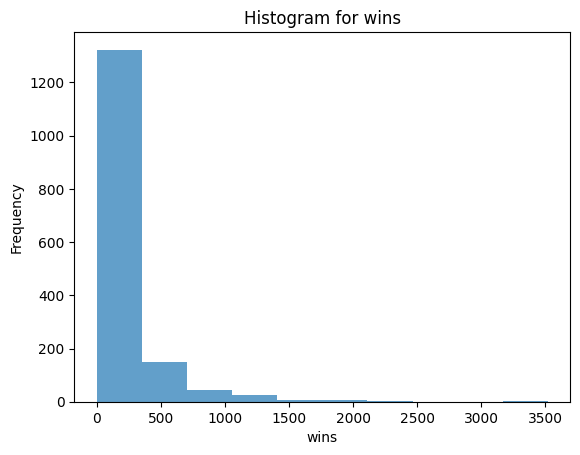

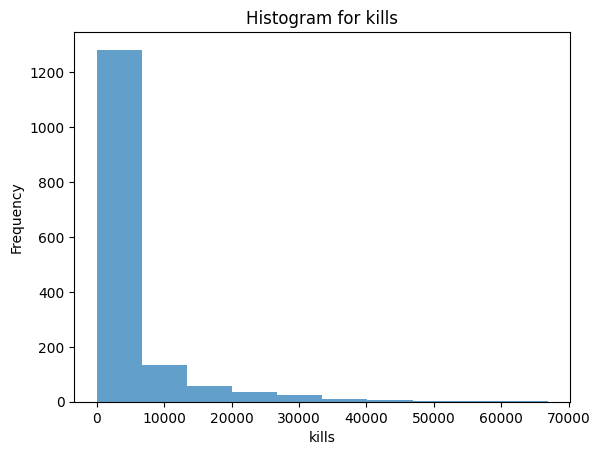

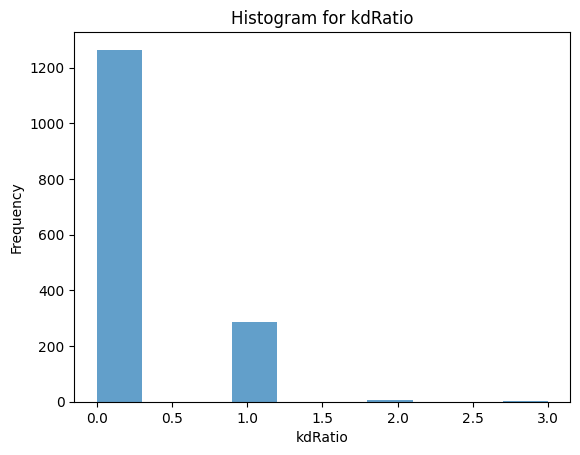

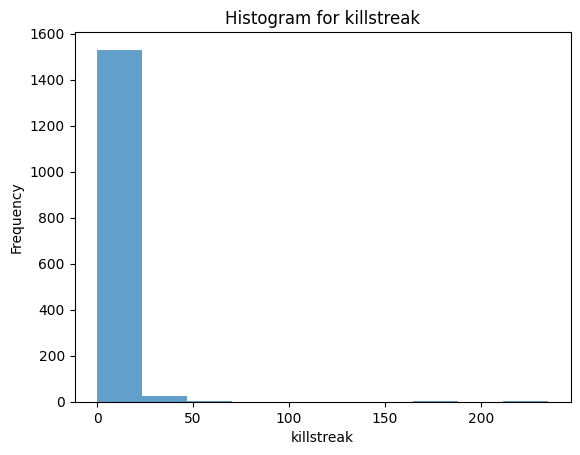

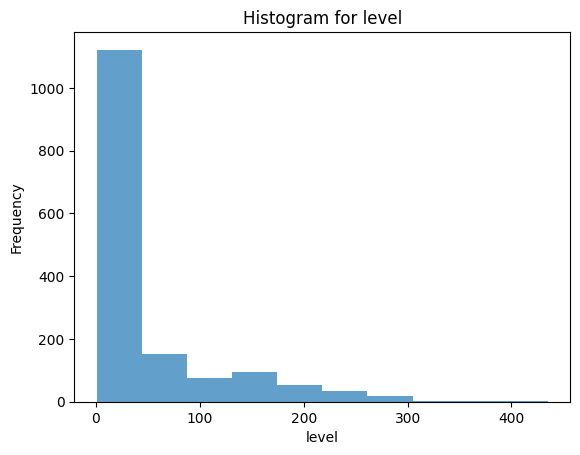

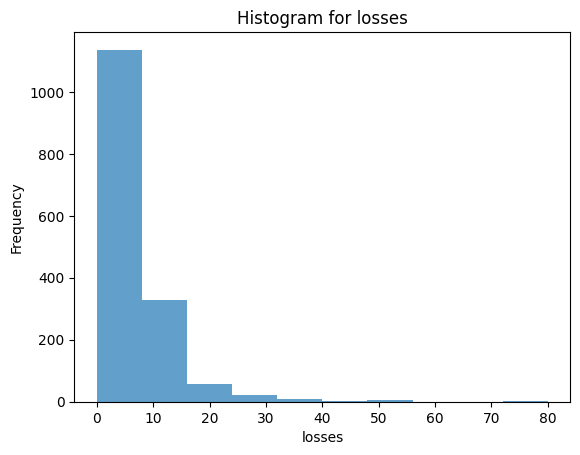

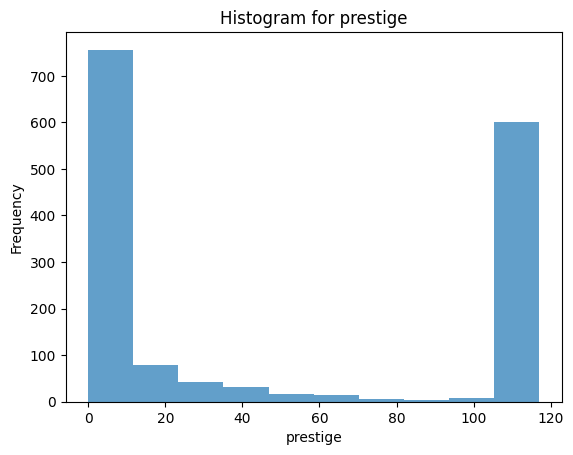

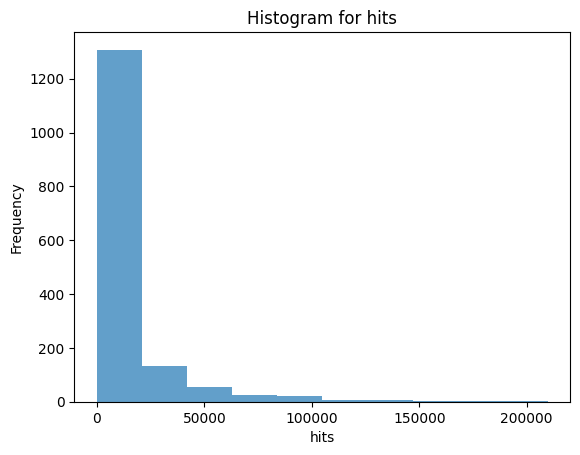

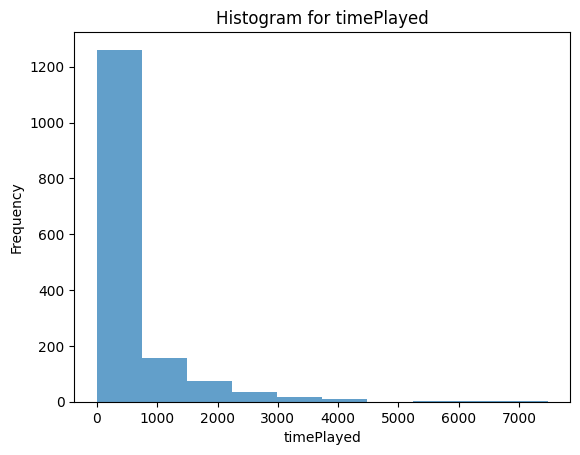

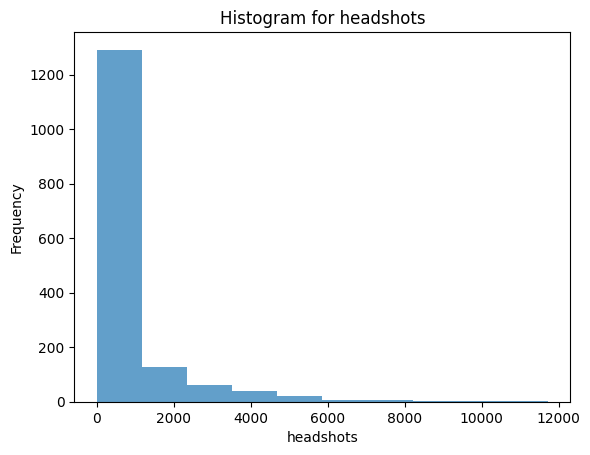

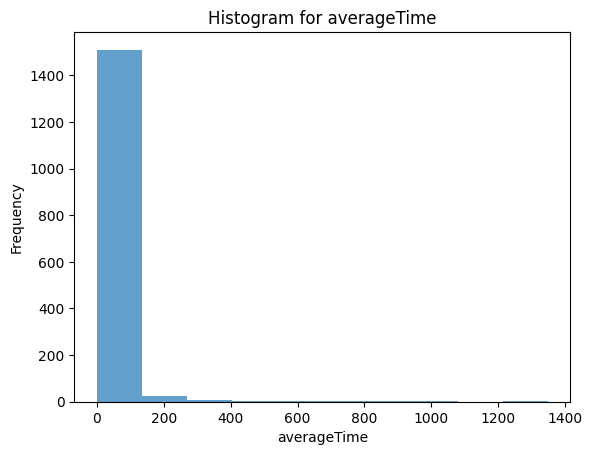

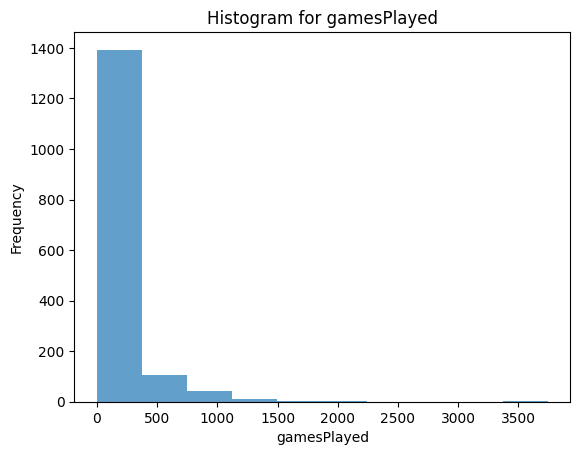

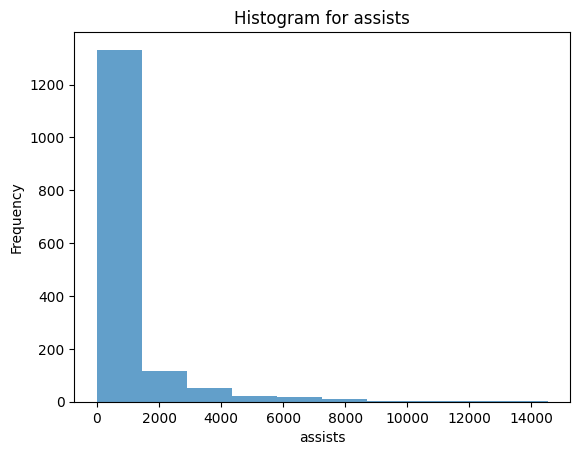

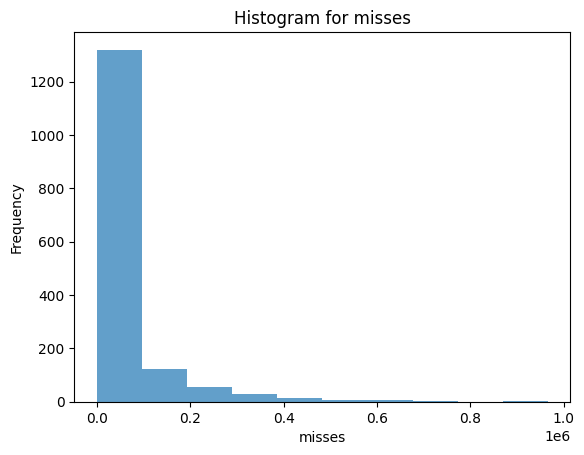

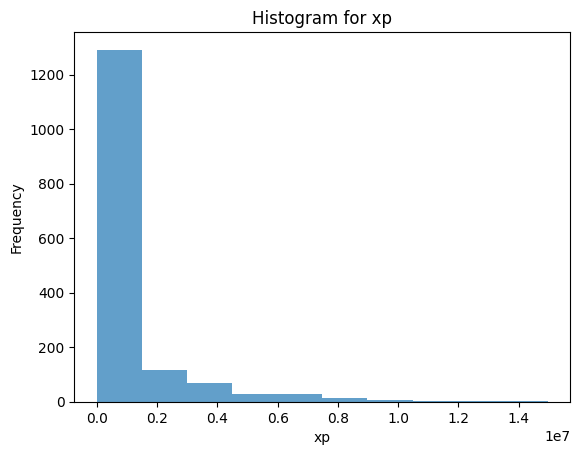

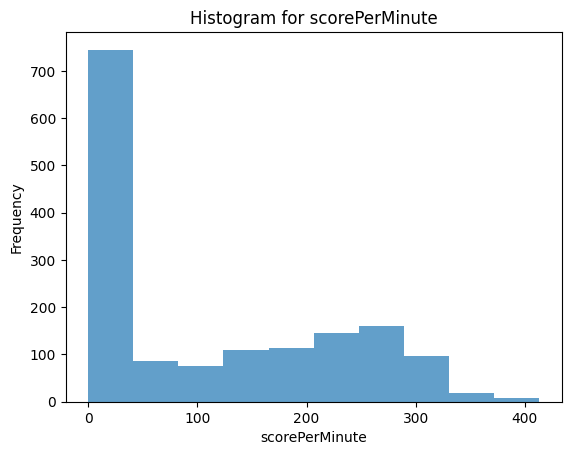

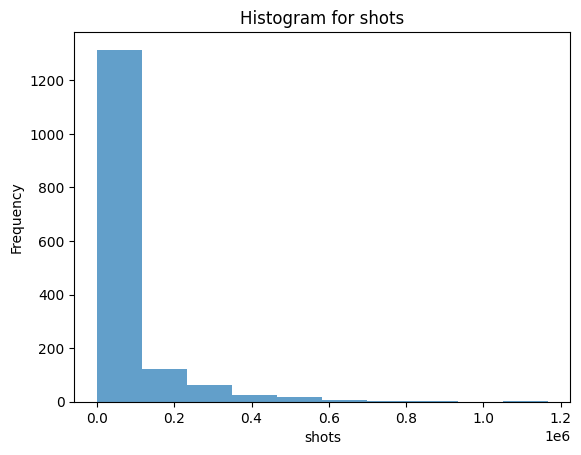

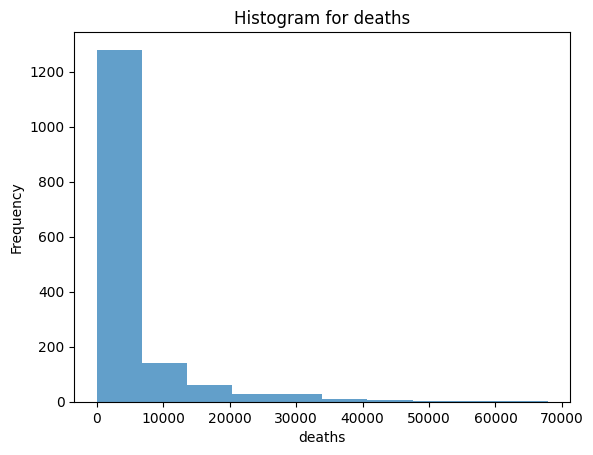

In [ ]:

df.dtypes

# Plot histogram for each feature
for column in df.columns:  # Loop through all columns in the DataFrame
    plt.hist(df[column], bins=10, alpha=0.7, label=column)  # Create histogram
    plt.title(f'Histogram for {column}')  # Add title
    plt.xlabel(column)  # Label x-axis
    plt.ylabel('Frequency')  # Label y-axis
    plt.show()  # Display the plot

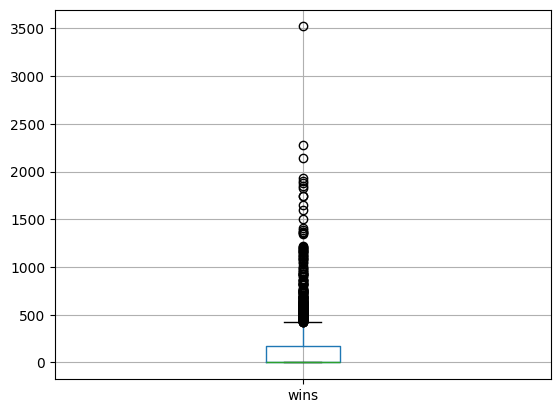

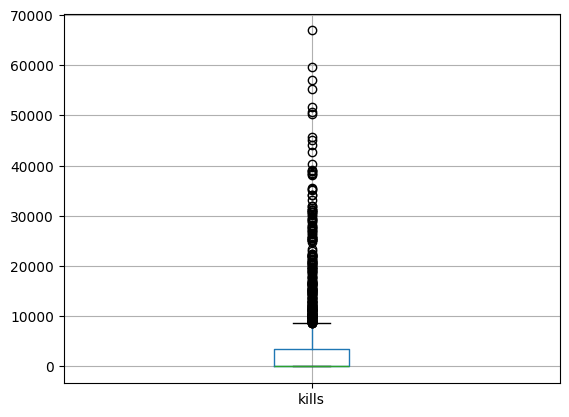

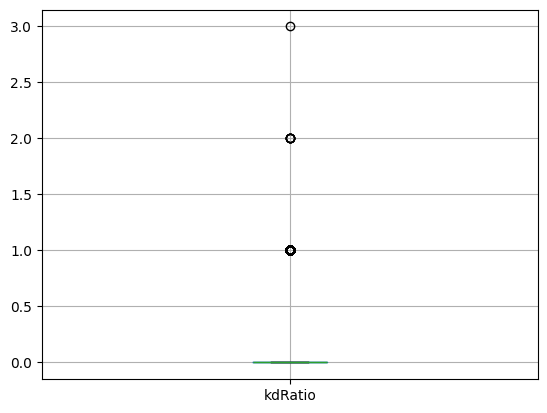

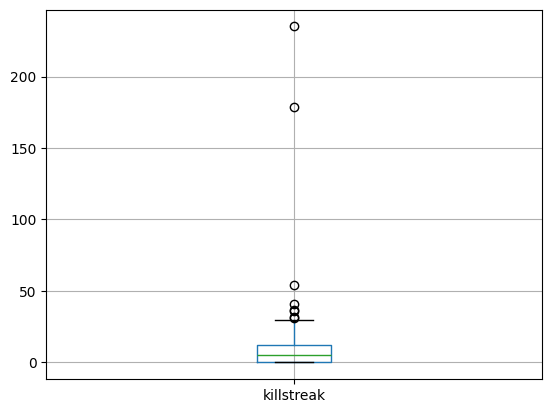

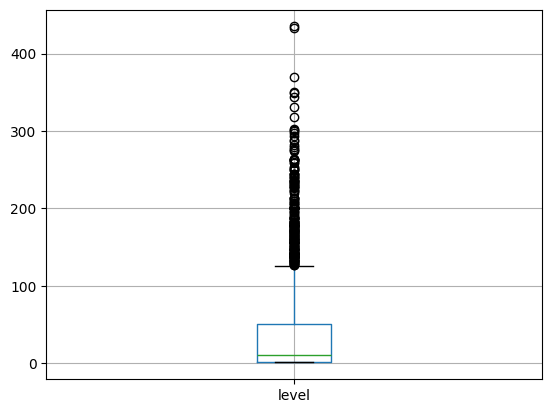

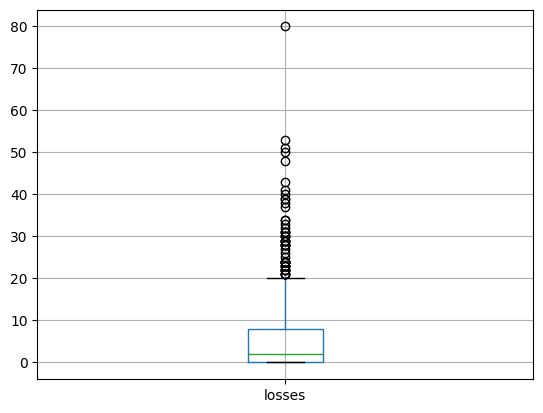

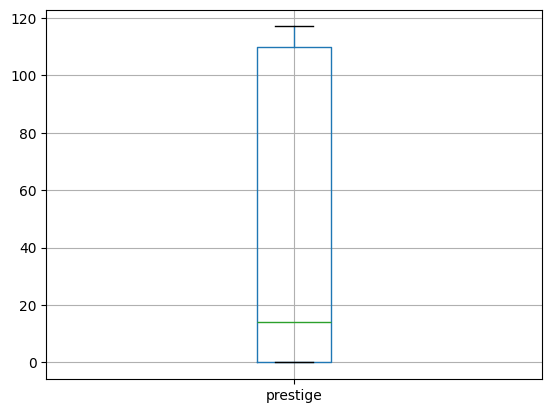

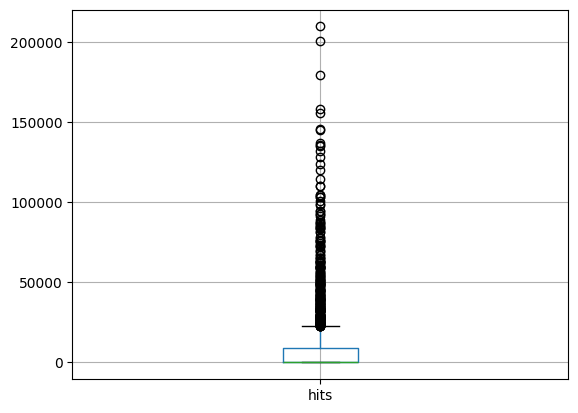

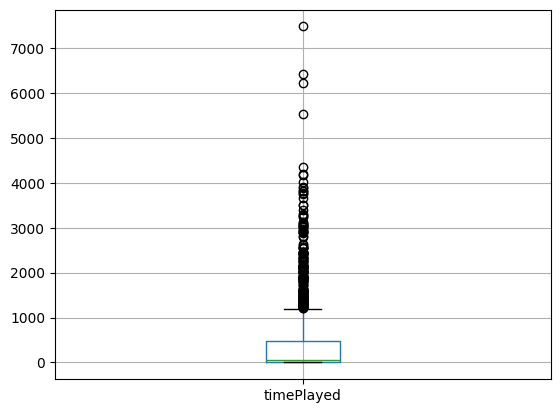

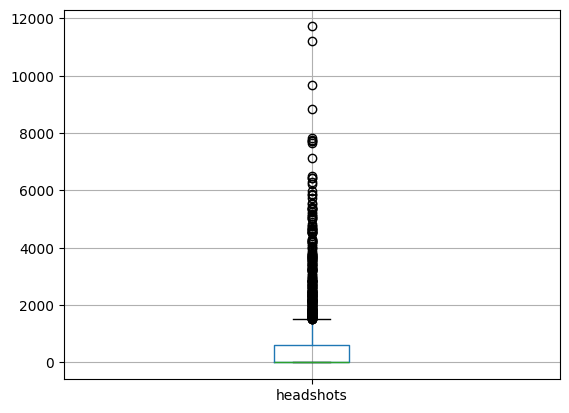

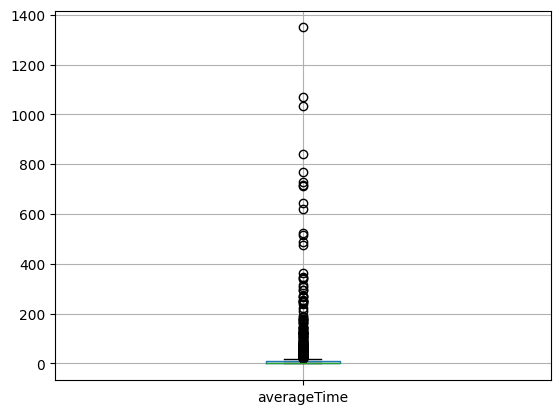

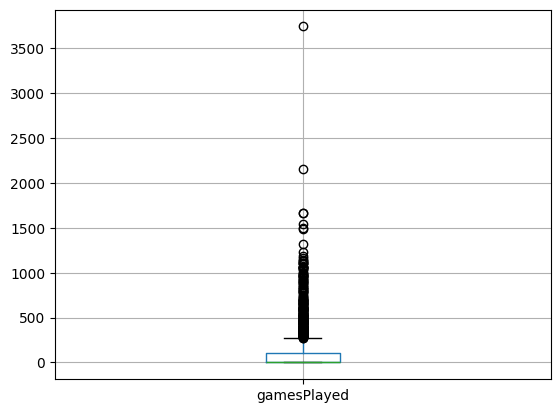

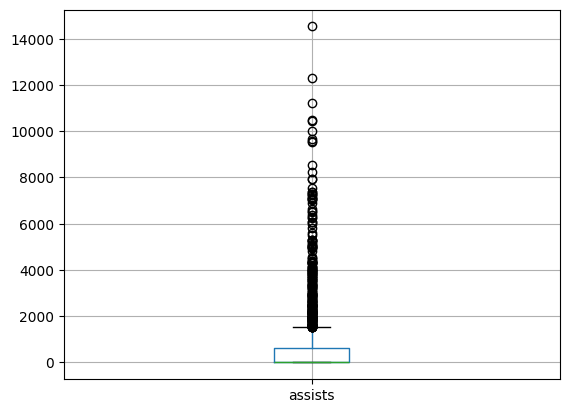

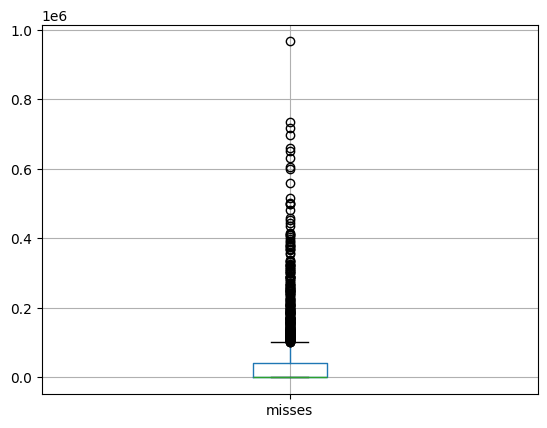

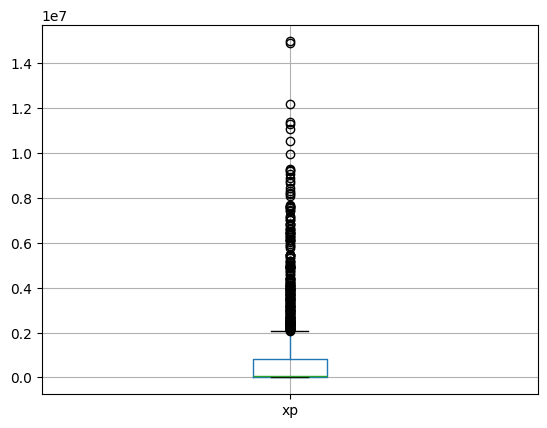

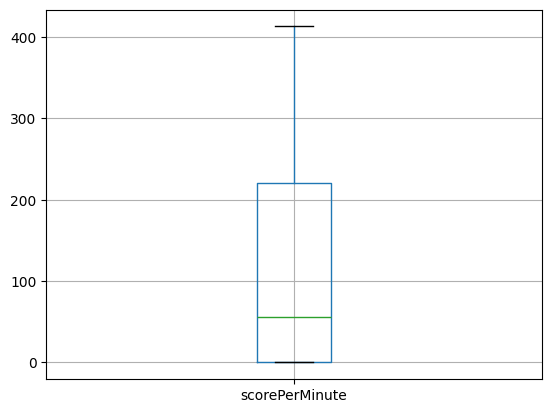

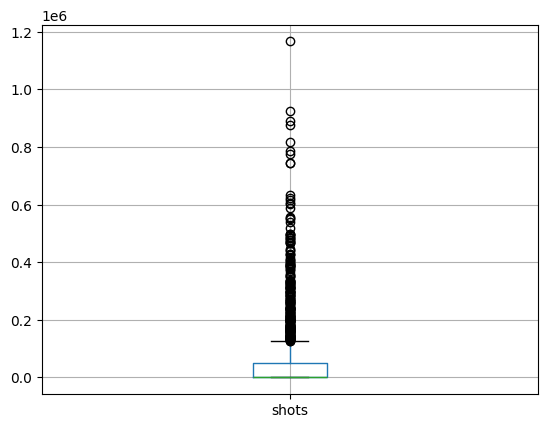

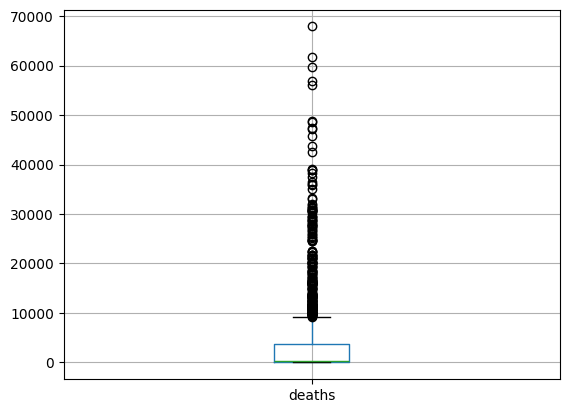

In [ ]:
#creating boxplots to identify and handle outliers
for i in df.columns:
  df.boxplot(column=[i])
  plt.show()


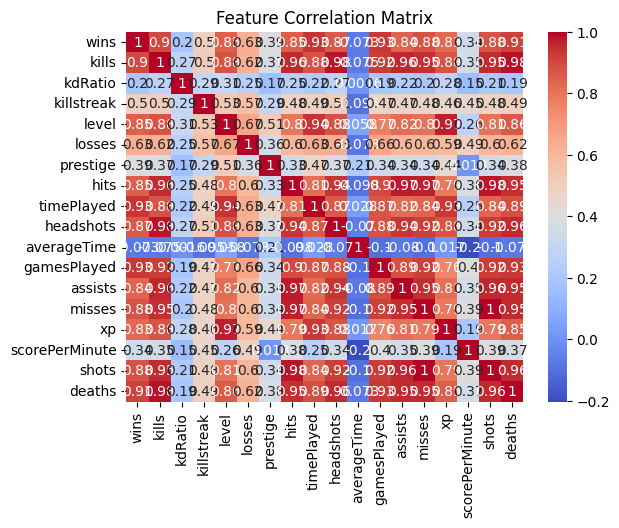

In [ ]:
#heatmap correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
#standardizing the features
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)
#standardizing the features
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)
# Convert the NumPy array back to a pandas DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled.head() # Now you can use head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.940171,0.0,0.000936,0.000000,0.005189,0.0,0.000000,0.0,0.000047,0.0,0.0,0.000236
2,0.000000,0.000986,0.333333,0.0,0.018433,0.0,0.940171,0.0,0.004279,0.001365,0.023721,0.0,0.000069,0.0,0.003226,0.0,0.0,0.000943
3,0.000853,0.000030,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000401,0.000000,0.002224,0.0,0.000000,0.0,0.000077,0.0,0.0,0.000074
4,0.000000,0.000030,0.000000,0.0,0.000000,0.0,0.940171,0.0,0.000669,0.000085,0.003706,0.0,0.000000,0.0,0.000067,0.0,0.0,0.000147



# DETERMINING K USING ELBOW METHOD

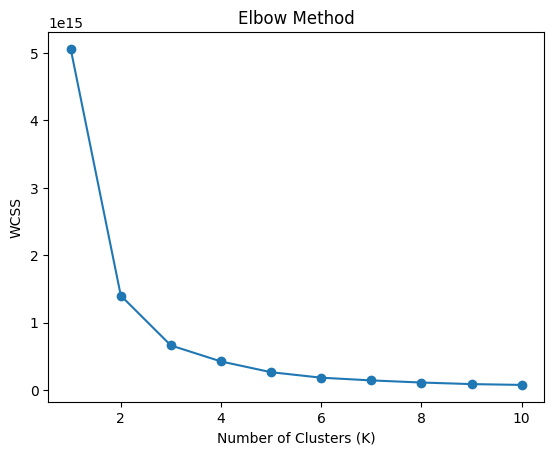

In [ ]:
wcss = []  # Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


# APPLY K MEANS CLUSTER


# VISUALIZE CLUSTERS

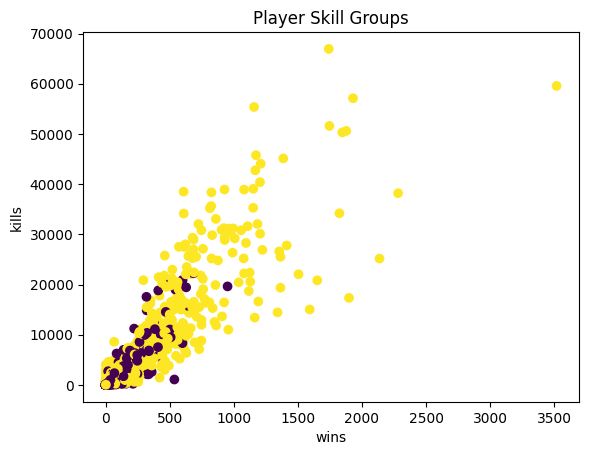

In [ ]:
#since the elbow curve is showing a major shift near 3
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(df_scaled)
df['Skill_Group'] = kmeans.labels_  # Add cluster labels to the dataset

import matplotlib.pyplot as plt
plt.scatter(df.iloc[:, 0],df.iloc[:, 1], c=df['Skill_Group'], cmap='viridis') # Use .iloc for integer-location based indexing
plt.title('Player Skill Groups')
plt.xlabel('wins')
plt.ylabel('kills')
plt.show()
